In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

# Data Representation

In [4]:
# Read data
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [5]:
#I displayed the first 5 rows to check the dataset structure
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#I checked the dataset details such as the number of rows and columns, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#got summary statistics for the numerical columns such as mean, standard deviation, minimum, and maximum.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Wrangling

**Check Missing Values**

In [8]:
#I checked for missing values in the dataset. The result showed no missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Check Duplicated Values**

In [9]:
#I checked for duplicate rows. The result was zero, which means there are no duplicates and the dataset is clean.
df.duplicated().sum()

0

**drop unneeded column**

In [10]:
#I dropped the RowNumber column because it’s just a row index and doesn’t affect the analysis or modeling
df=df.drop('RowNumber',axis=1)

In [11]:
#I dropped the CustomerId column because it’s a unique identifier for customers and doesn’t influence the analysis or modeling.
df=df.drop('CustomerId',axis=1)

In [12]:
#I dropped the Surname column because it doesn’t help in the analysis or predicting customer churn it’s just a last name, not related to customer behavior.
df=df.drop('Surname',axis=1)

**Check Outliers Values**

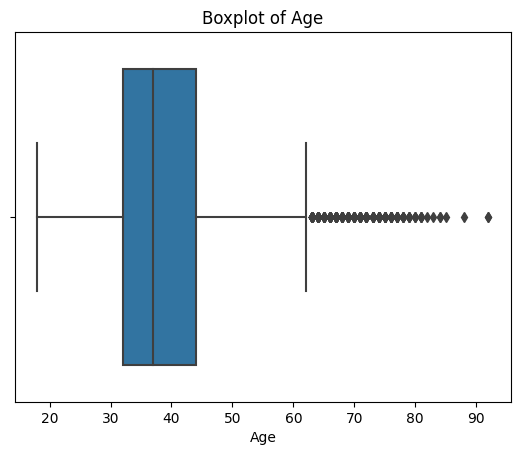

In [13]:
#I created a boxplot for the Age column to see the age distribution and detect any outliers and it showed some outliers at higher ages above 60
sns.boxplot(x=df['Age']) 
plt.title('Boxplot of Age') 
plt.show()

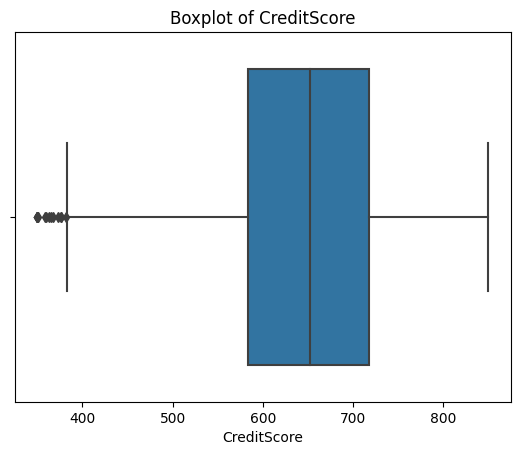

In [14]:
#I made a boxplot for CreditScore to see its distribution, and it showed only a few outliers
sns.boxplot(x=df['CreditScore'])
plt.title('Boxplot of CreditScore') 
plt.show()

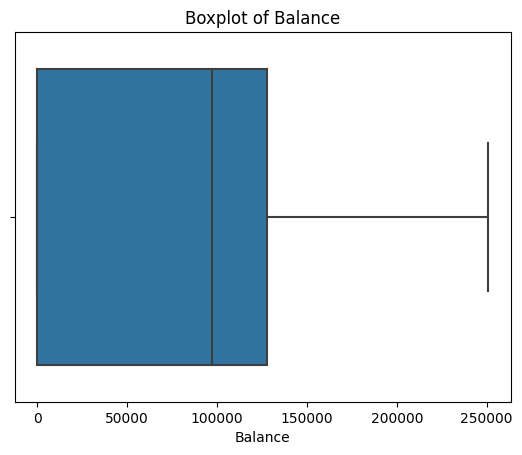

In [15]:
#I made a boxplot for Balance, and it showed some outliers at higher balances.
sns.boxplot(x=df['Balance'])
plt.title('Boxplot of Balance')
plt.show()

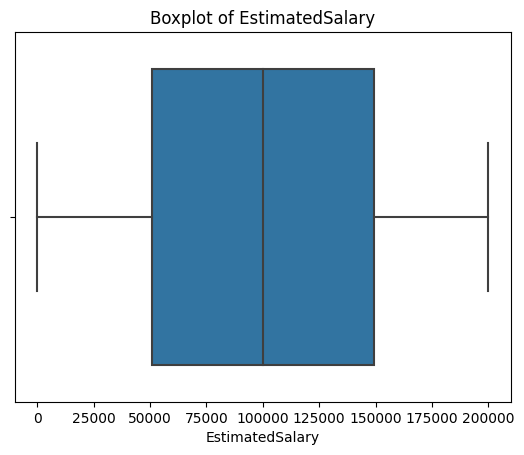

In [16]:
#The boxplot of EstimatedSalary shows a wide spread with some outliers, indicating salary variation among customers.
sns.boxplot(x=df['EstimatedSalary'])
plt.title('Boxplot of EstimatedSalary') 
plt.show()

# Exploratory Data Analysis
* The purpose of EDA is to detect anomalies, check data quality, and gain insights into how customer attributes influence the target variable (Exited).

**Univariate Analysis**

**CreditScore Column**

In [17]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

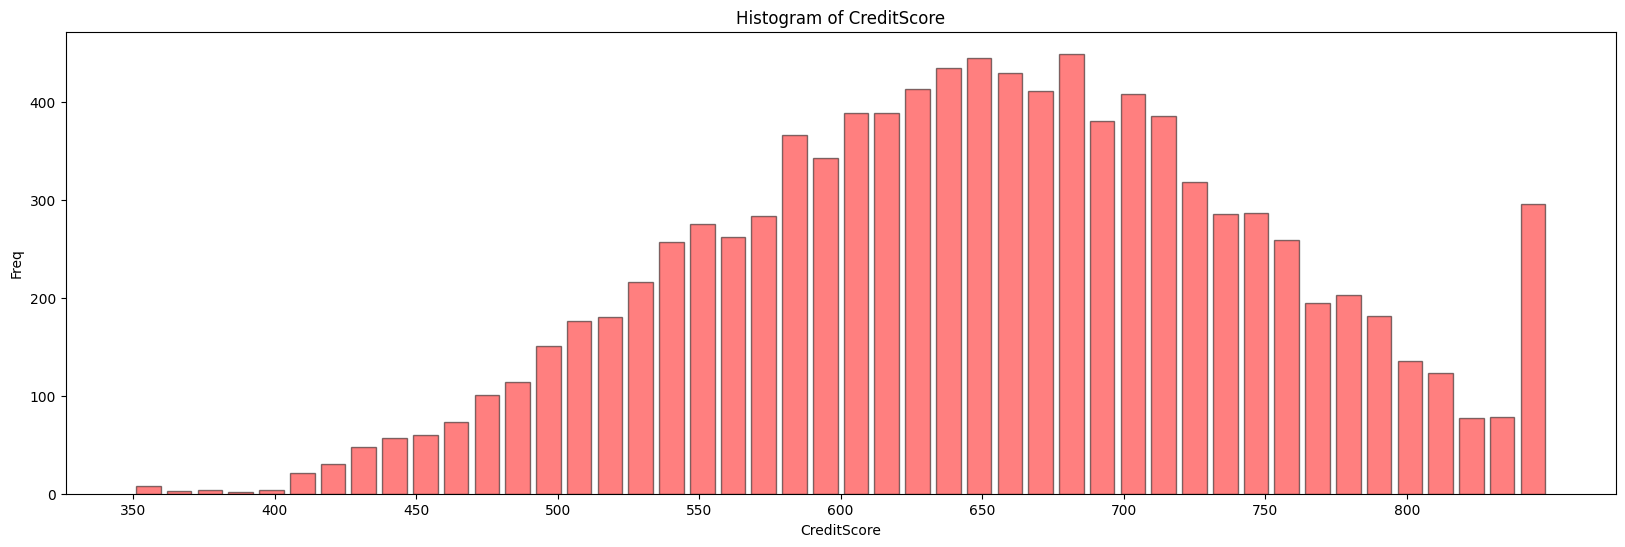

In [19]:
plt.figure(figsize=(20, 6))
plt.hist(x=df['CreditScore'], bins=46, color='red', edgecolor='black', rwidth=0.8, alpha=0.5) 
plt.xticks(np.arange(350, 850,50)) 
plt.title('Histogram of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Freq')
plt.show()

/tmp/ipykernel_36/684599007.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


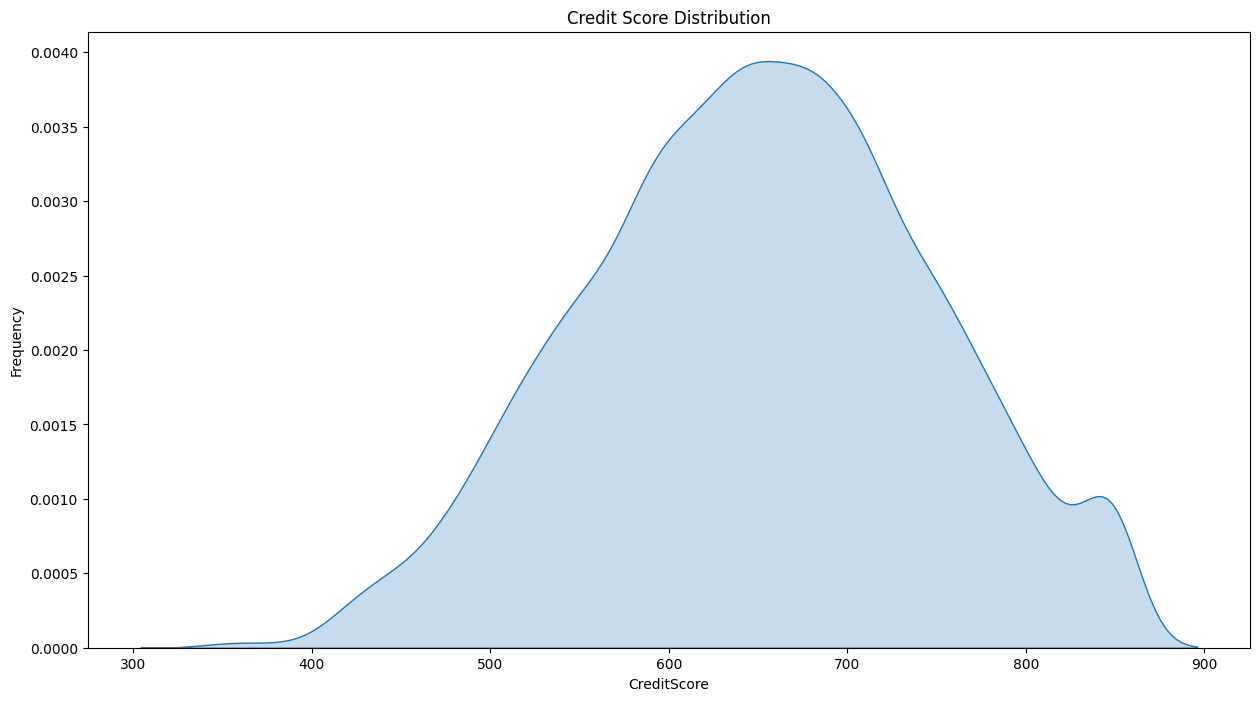

In [20]:
plt.figure(figsize=(15, 8))
sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")
plt.title('Credit Score Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

plt.show()

* The distribution of credit scores leans towards the higher end, with many customers close to 800.

* This pattern suggests that high credit scores are common among the customers.

* It indicates that most customers have a good credit history and show financial reliability.



**Geography Column**

In [21]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

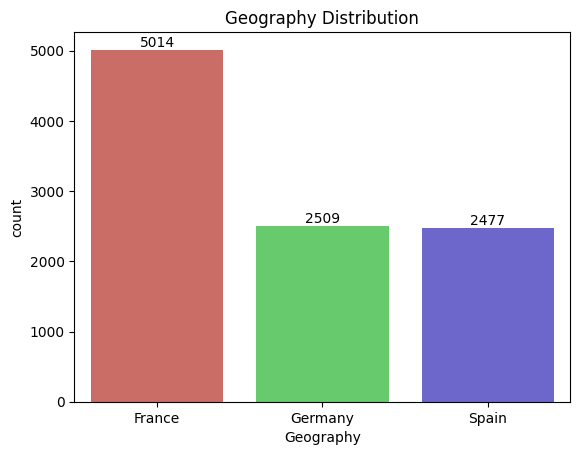

In [22]:
ax=sns.barplot(x=df['Geography'].value_counts().index, y= df['Geography'].value_counts().values, palette=sns.color_palette("hls", 3)) 
plt.title('Geography Distribution') 
plt.ylabel("count") 
plt.xlabel("Geography")
ax.bar_label(ax.containers[0]) 
plt.show()

* The bar plot shows the distribution of customers across different geographies, with France having the largest customer base, followed by Germany and Spain.

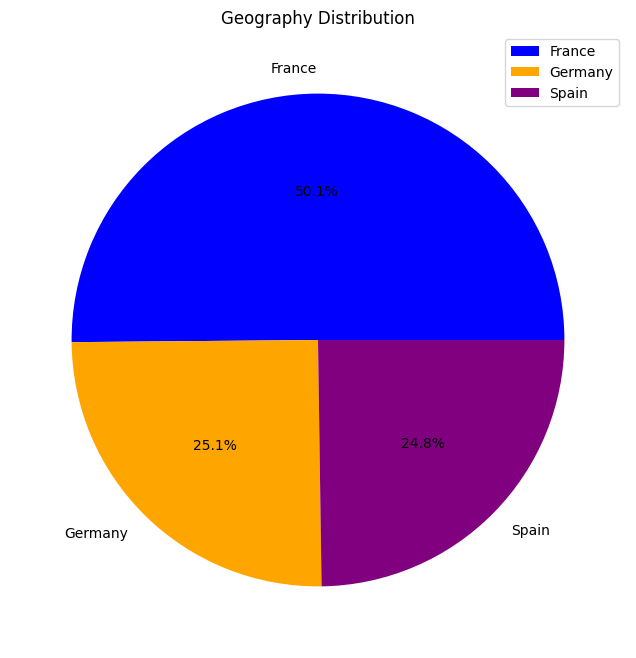

In [23]:
plt.figure(figsize=(10, 8)) 
plt.pie(x=df['Geography'].value_counts(), labels=df['Geography'].value_counts().index, autopct="%1.1f%%", colors=['blue', 'orange', 'purple'], explode=[0,0,0]) 
plt.legend() 
plt.title('Geography Distribution') 
plt.show()

* The pie chart illustrates the proportion of customers by geography. France has the largest share of customers, followed by Germany and Spain.

**Gender Column**



In [24]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

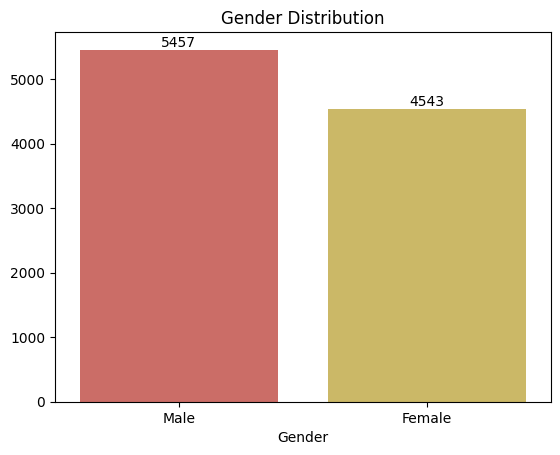

In [25]:
ax=sns.barplot(x=df['Gender'].value_counts().index, y= df['Gender'].value_counts().values, palette=sns.color_palette("hls", 8)) 
plt.title('Gender Distribution') 
ax.bar_label(ax.containers[0])
plt.show()

* The bar plot shows the gender distribution of customers, with a slightly higher number of male customers compared to female customers.

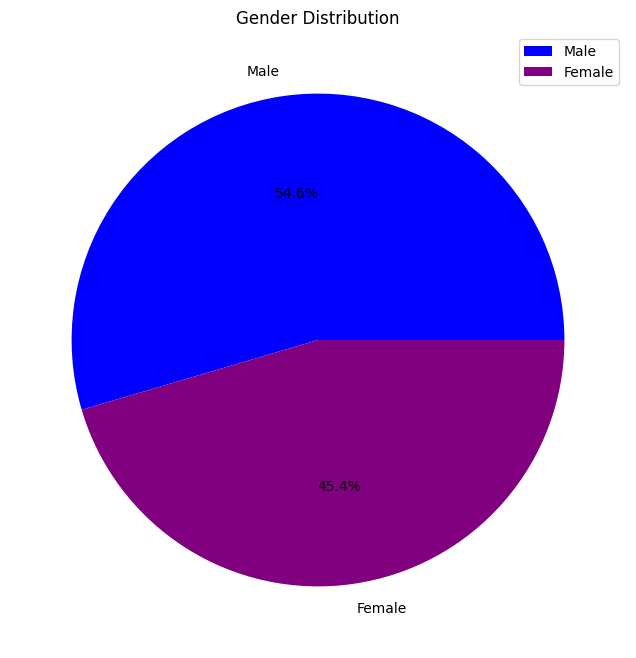

In [26]:
plt.figure(figsize=(10, 8))
plt.pie(x=df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct="%1.1f%%", colors=['blue', 'purple'], explode=[0,0]) 
plt.legend() 
plt.title('Gender Distribution') 
plt.show()

* The pie chart illustrates the gender distribution of customers, showing that male customers slightly outnumber female customers.

**Age Column**

In [27]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

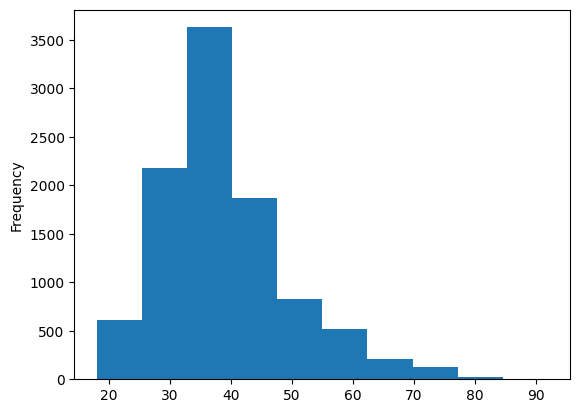

In [29]:
df['Age'].plot(kind='hist')

* The histogram of Age shows that most customers are concentrated between their 30s and 40s
* Indicating that the majority of the customer base is middle-aged

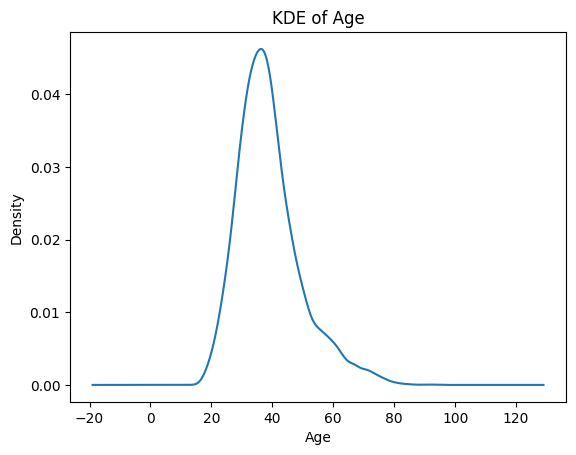

In [28]:
df['Age'].plot(kind='kde')
plt.title("KDE of Age")
plt.xlabel("Age") 
plt.show()

* The KDE plot shows the smooth distribution of customer ages.

* Most customers are clustered around the mid-30s to 40s age range.

* The density curve highlights that middle-aged customers form the largest group.

**Tenure Column**

In [30]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

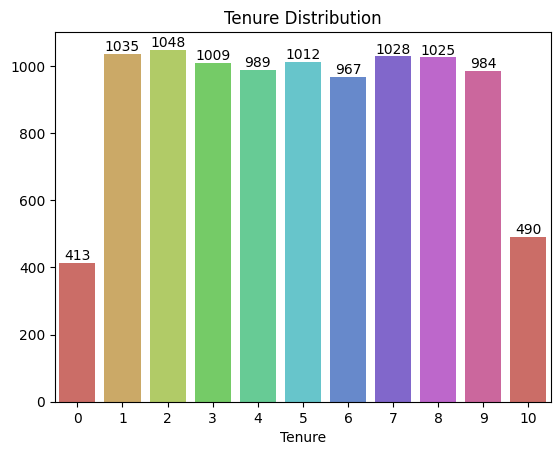

In [31]:
ax=sns.barplot(x=df['Tenure'].value_counts().index, y= df['Tenure'].value_counts().values, palette=sns.color_palette("hls", 10)) 
plt.title('Tenure Distribution')
ax.bar_label(ax.containers[0]) 
plt.show()

* The bar plot shows that customers are spread across different tenure years, with no extreme concentration in a single value
* Indicating a relatively balanced distribution.

**Balance Column**

<Axes: ylabel='Frequency'>

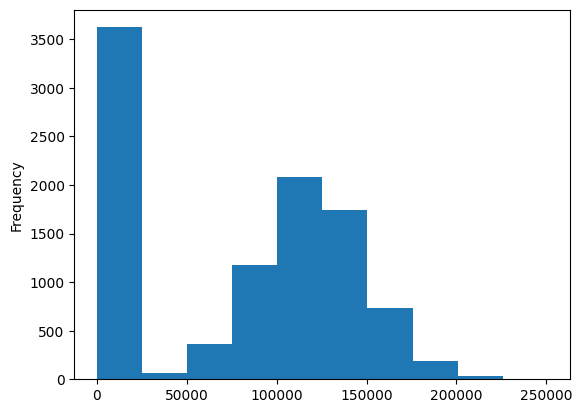

In [32]:
df['Balance'].plot(kind='hist')

* The histogram of Balance shows that many customers have a balance close to zero, while others are distributed across higher balance ranges.

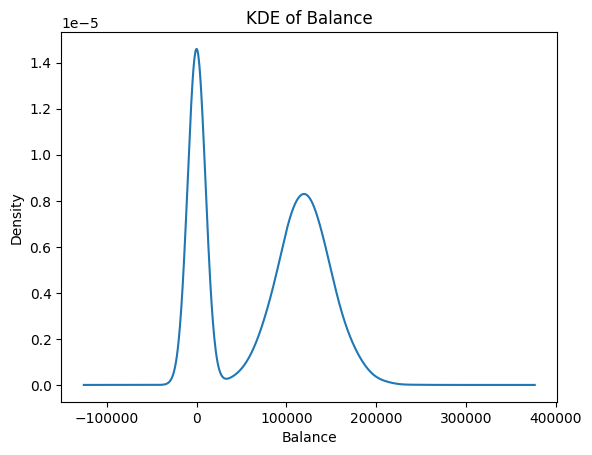

In [33]:
df['Balance'].plot(kind='kde')
plt.title("KDE of Balance") 
plt.xlabel("Balance") 
plt.show()

* The KDE plot of Balance shows a high density near zero, indicating many customers keep little or no balance in their accounts.

**NumOfProducts Column**

In [34]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

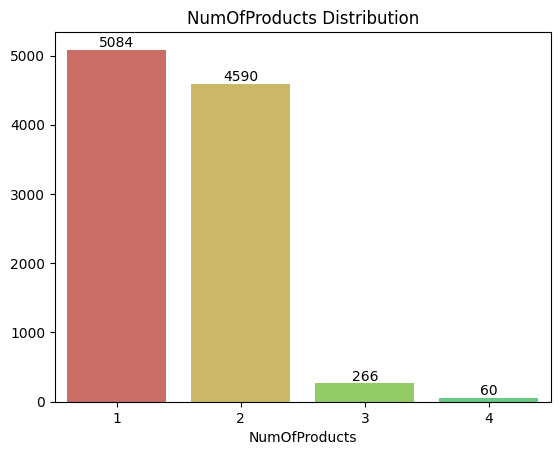

In [35]:
ax=sns.barplot(x=df['NumOfProducts'].value_counts().index, y= df['NumOfProducts'].value_counts().values, palette=sns.color_palette("hls", 8)) 
plt.title('NumOfProducts Distribution')
ax.bar_label(ax.containers[0]) 
plt.show()

* The bar plot shows that most customers hold only one or two products, while very few have three or four.

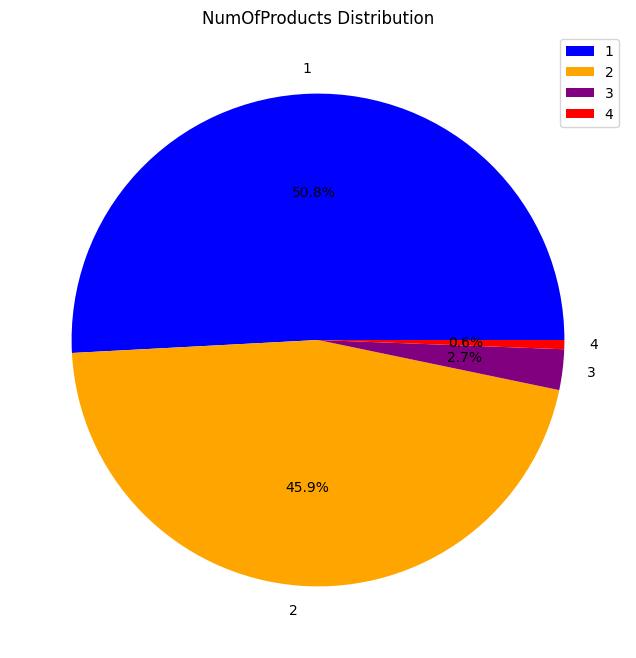

In [36]:
plt.figure(figsize=(10, 8)) 
plt.pie(x=df['NumOfProducts'].value_counts(), labels=df['NumOfProducts'].value_counts().index, autopct="%1.1f%%", colors=['blue', 'orange', 'purple','red'], explode=[0,0,0,0]) 
plt.legend() 
plt.title('NumOfProducts Distribution') 
plt.show()

**HasCrCard Column**

In [37]:
df["HasCrCard"].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

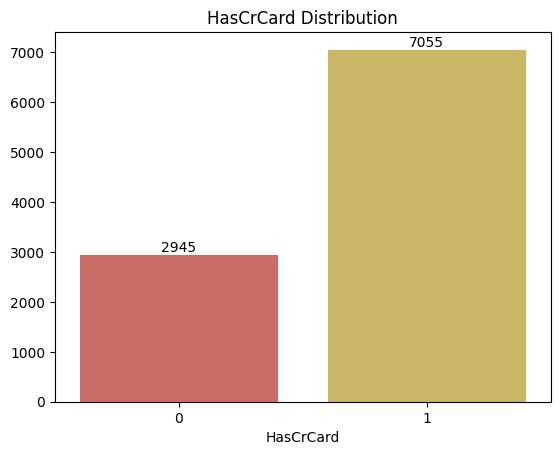

In [38]:
ax=sns.barplot(x=df['HasCrCard'].value_counts().index, y= df['HasCrCard'].value_counts().values, palette=sns.color_palette("hls", 8))
plt.title('HasCrCard Distribution')
ax.bar_label(ax.containers[0])
plt.show()

* The bar plot shows that a majority of customers have a credit card, while a smaller portion do not.

**IsActiveMember Column**

In [39]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

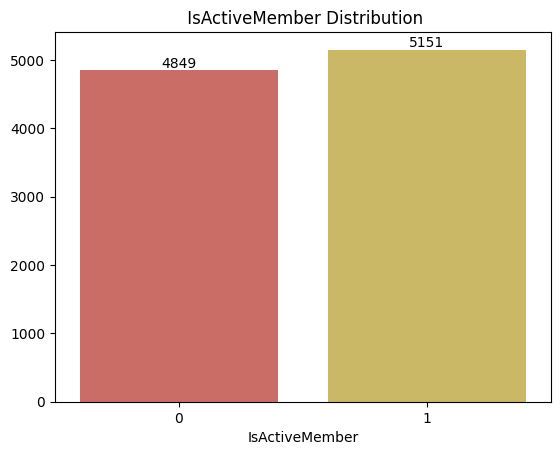

In [40]:
ax=sns.barplot(x=df['IsActiveMember'].value_counts().index, y= df['IsActiveMember'].value_counts().values, palette=sns.color_palette("hls", 8))
plt.title(' IsActiveMember Distribution') 
ax.bar_label(ax.containers[0])
plt.show()


* The bar plot shows that most customers are active members, while a smaller portion are inactive.

**EstimatedSalary**

In [41]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<Axes: ylabel='Frequency'>

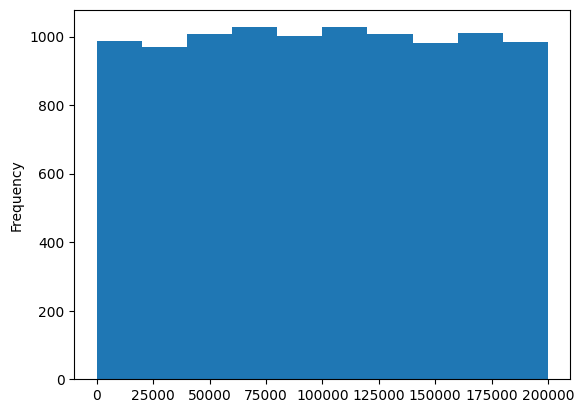

In [42]:
df['EstimatedSalary'].plot(kind='hist')

* The histogram of EstimatedSalary shows that customer salaries are spread across a wide range, with most customers earning mid-range salaries.

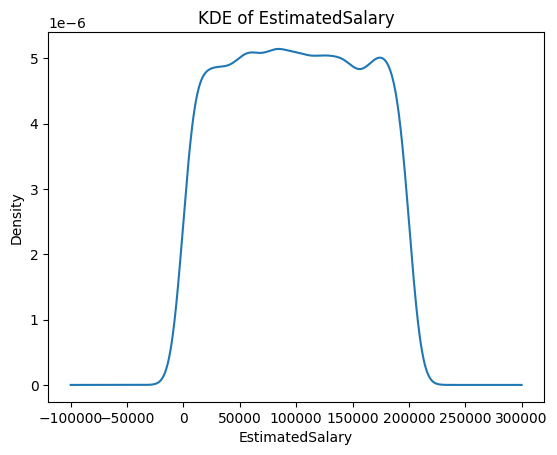

In [43]:
df['EstimatedSalary'].plot(kind='kde')
plt.title("KDE of EstimatedSalary")
plt.xlabel("EstimatedSalary") 
plt.show()


* The KDE plot shows that most customers have estimated salaries concentrated in the mid-range, with few customers earning very high or very low salaries.

**Exited Column**

In [44]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

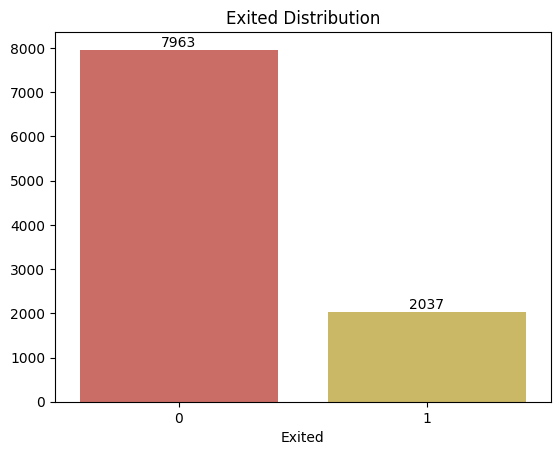

In [45]:
ax=sns.barplot(x=df['Exited'].value_counts().index, y= df['Exited'].value_counts().values, palette=sns.color_palette("hls", 8))
plt.title('Exited Distribution')
ax.bar_label(ax.containers[0])
plt.show()

* The bar plot shows that most customers stayed with the bank, while a smaller portion exited.

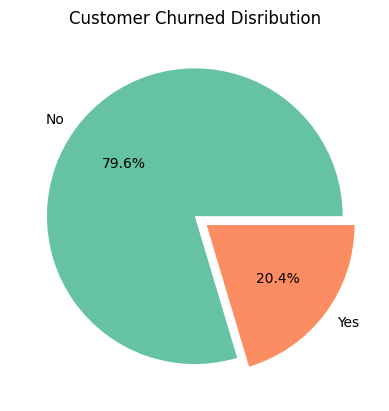

In [46]:
count = df["Exited"].value_counts()
plt.pie(count.values, labels=['No', 'Yes'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),explode=[0, 0.1])
plt.title("Customer Churned Disribution")
plt.show()

**Bivariate Analysis**

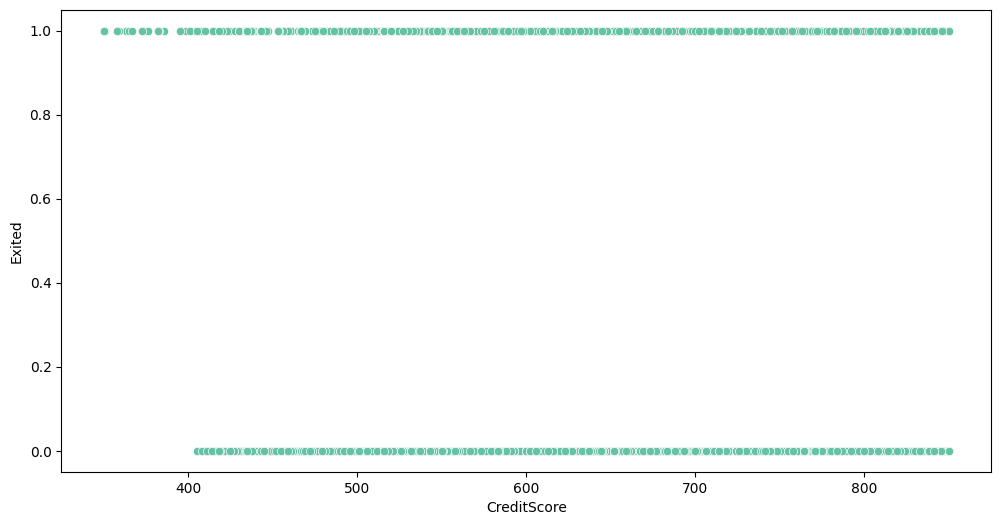

In [47]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='CreditScore', y='Exited') 
plt.show()

* The scatter plot shows that customers who exited have a wide range of credit scores, indicating no clear pattern between credit score and churn.

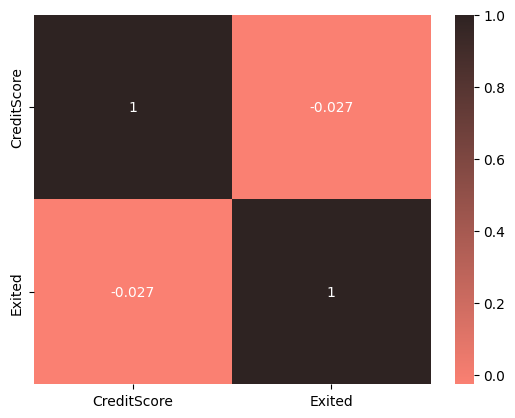

In [48]:
sns.heatmap(df[['CreditScore', 'Exited']].corr(), annot=True, cmap=sns.color_palette("dark:salmon_r", as_cmap=True)) 
plt.show()

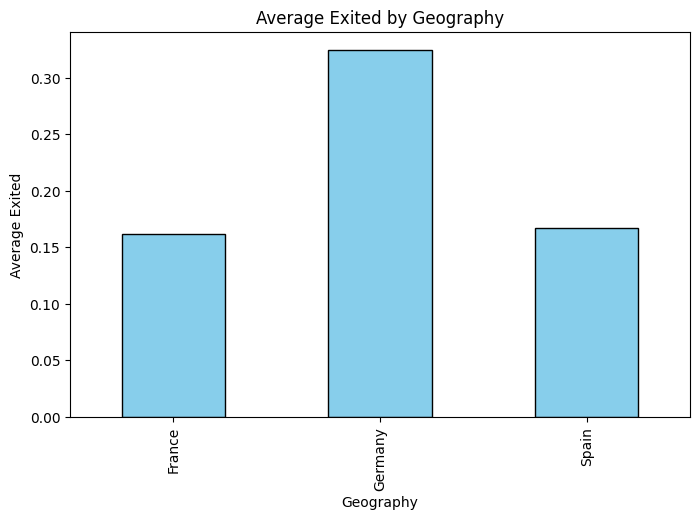

In [49]:
df.groupby('Geography')['Exited'].mean().plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black') 
plt.title('Average Exited by Geography') 
plt.ylabel('Average Exited') 
plt.xlabel('Geography') 
plt.show()

* From the analysis, it is clear that the exit rate varies by geography, with customers from Germany showing a slightly higher likelihood of leaving compared to France and Spain.

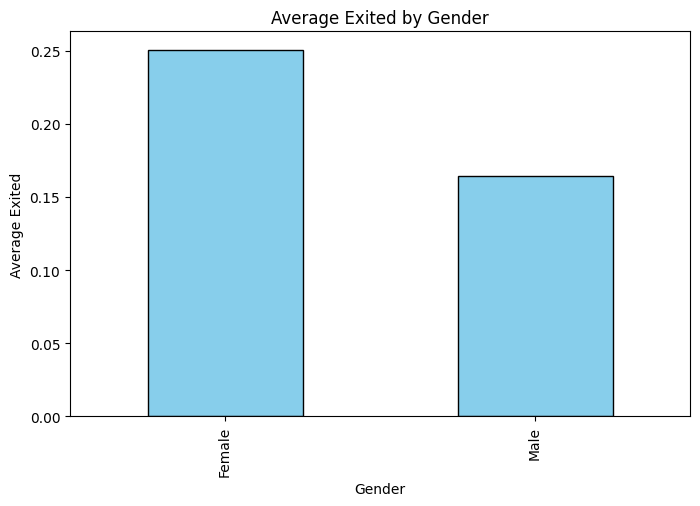

In [50]:
df.groupby('Gender')['Exited'].mean().plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.title('Average Exited by Gender')
plt.ylabel('Average Exited')
plt.xlabel('Gender') 
plt.show()

* From the analysis, it is clear that gender has little impact on customer churn, although a slightly higher percentage of females exited compared to males.

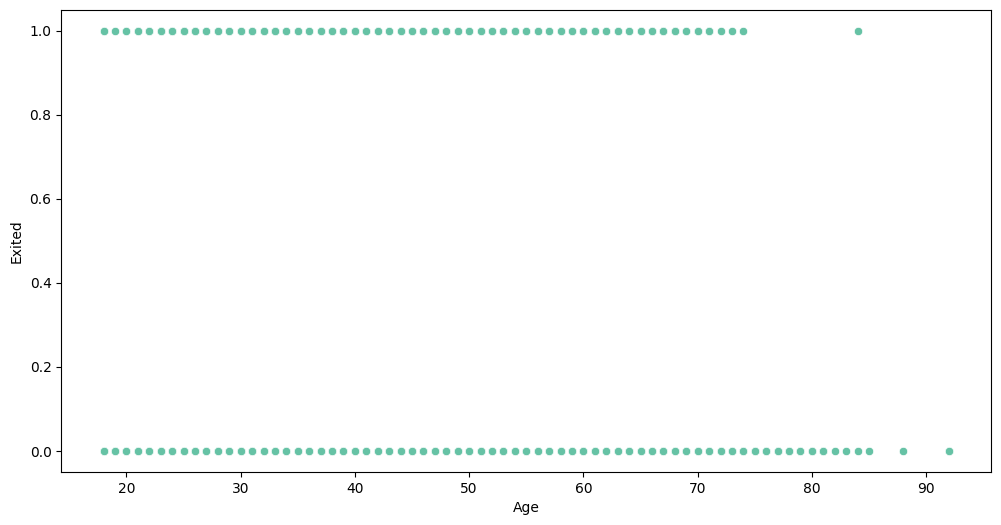

In [51]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(data=df, x='Age', y='Exited') 
plt.show()

* From the analysis, it is clear that age has some influence on customer churn, with higher exit rates observed among younger and very old customers.

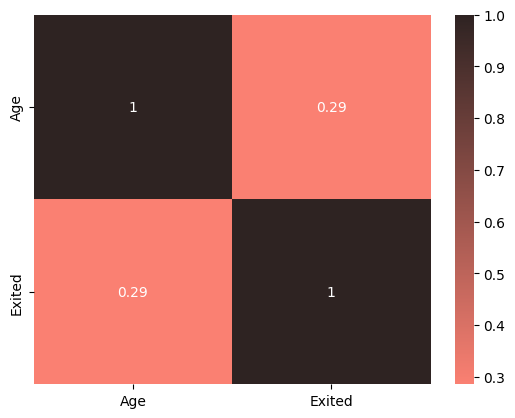

In [52]:
sns.heatmap(df[['Age', 'Exited']].corr(), annot=True, cmap=sns.color_palette("dark:salmon_r", as_cmap=True)) 
plt.show()

* From the analysis, scatter plot suggests some pattern between age and churn, but the correlation shows a very weak linear relationship, indicating age alone is not a strong factor.

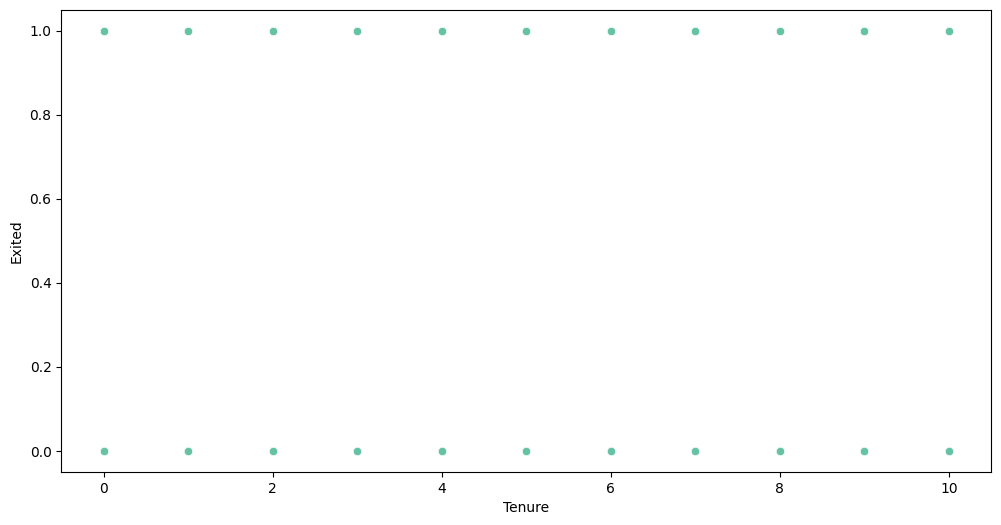

In [54]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Tenure', y='Exited') 
plt.show() 


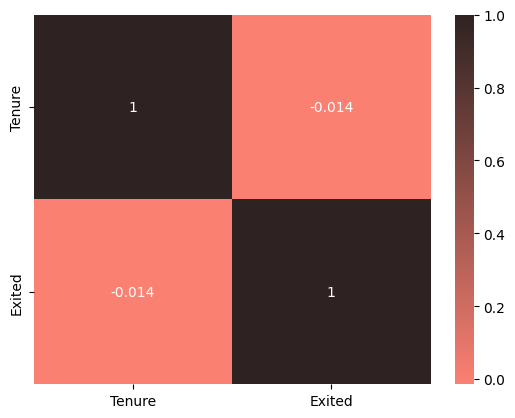

In [55]:
sns.heatmap(df[['Tenure', 'Exited']].corr(), annot=True, cmap=sns.color_palette("dark:salmon_r", as_cmap=True))
plt.show()

* From the analysis, the scatter plot shows a slight trend where customers with shorter tenure tend to exit more, but the correlation indicates a very weak linear relationship, suggesting tenure alone is not a strong factor in customer churn.

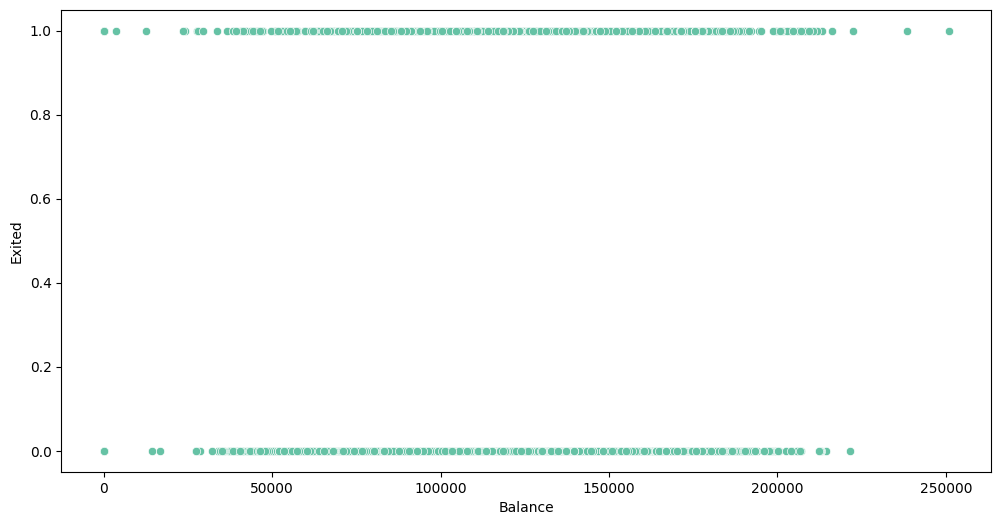

In [56]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(data=df, x='Balance', y='Exited') 
plt.show() 


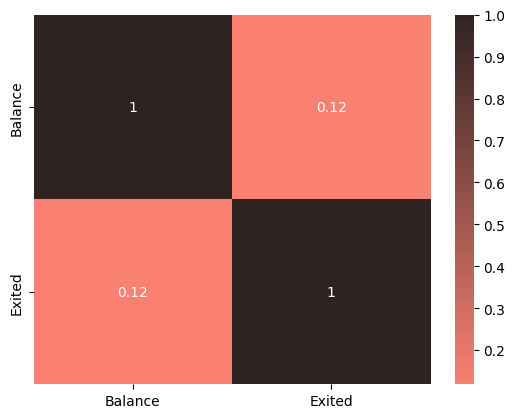

In [57]:
sns.heatmap(df[['Balance', 'Exited']].corr(), annot=True, cmap=sns.color_palette("dark:salmon_r", as_cmap=True)) 
plt.show()

* From the analysis, the scatter plot shows no clear pattern between account balance and churn, and the correlation confirms a very weak relationship, suggesting balance alone does not strongly influence customer exit.

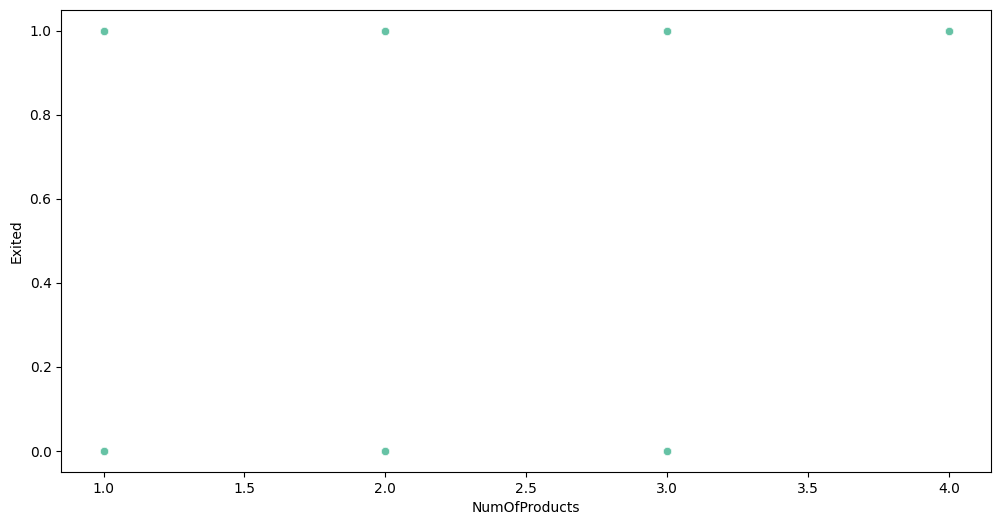

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='NumOfProducts', y='Exited')
plt.show()


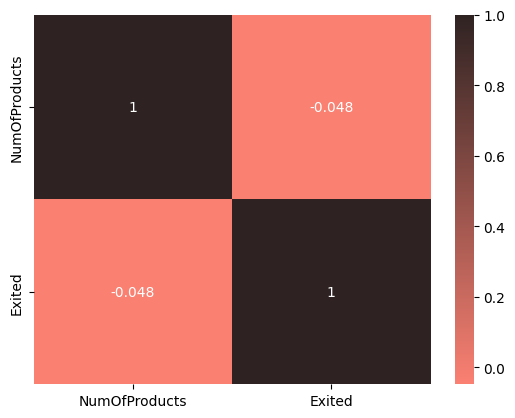

In [59]:
sns.heatmap(df[['NumOfProducts', 'Exited']].corr(), annot=True, cmap=sns.color_palette("dark:salmon_r", as_cmap=True)) 
plt.show()

* From the analysis, the scatter plot suggests that customers with fewer products tend to exit more, but the correlation shows a very weak relationship, indicating that number of products alone is not a strong factor for churn.

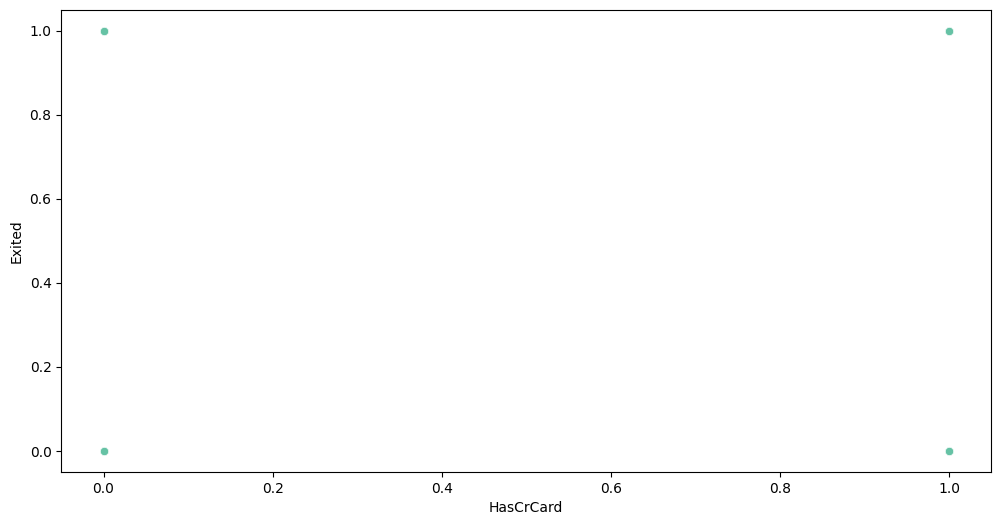

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='HasCrCard', y='Exited') 
plt.show()


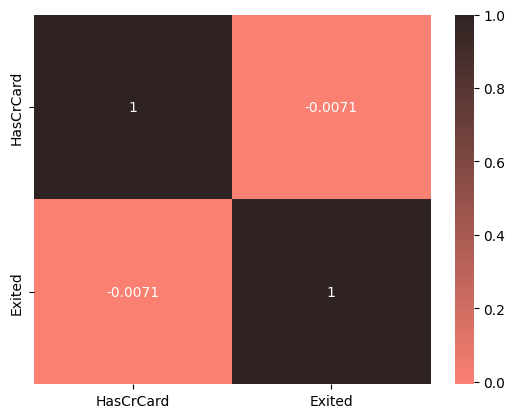

In [61]:
sns.heatmap(df[['HasCrCard', 'Exited']].corr(), annot=True, cmap=sns.color_palette("dark:salmon_r", as_cmap=True))
plt.show()

* From the analysis, the scatter plot shows no clear pattern between having a credit card and churn, and the correlation confirms a very weak relationship, indicating credit card ownership alone does not strongly influence customer exit.

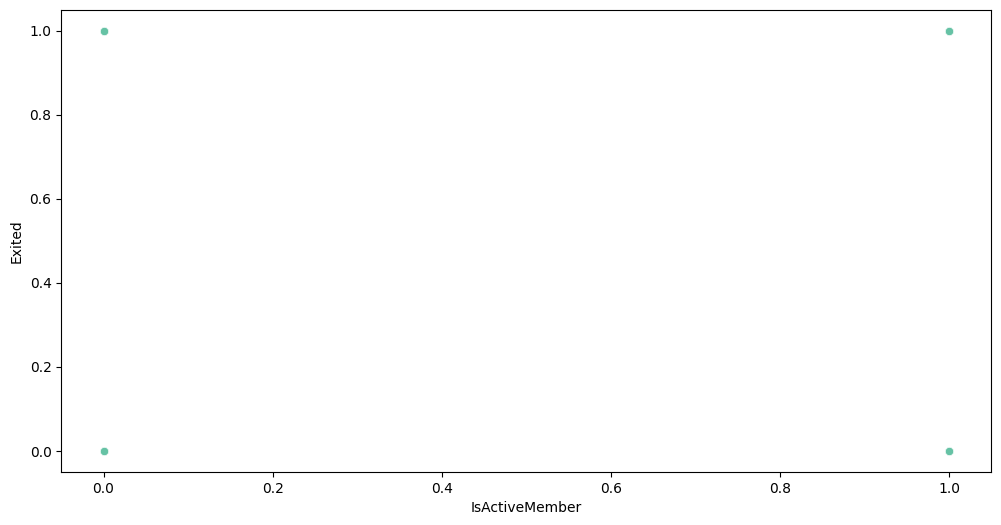

In [62]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(data=df, x='IsActiveMember', y='Exited') 
plt.show() 


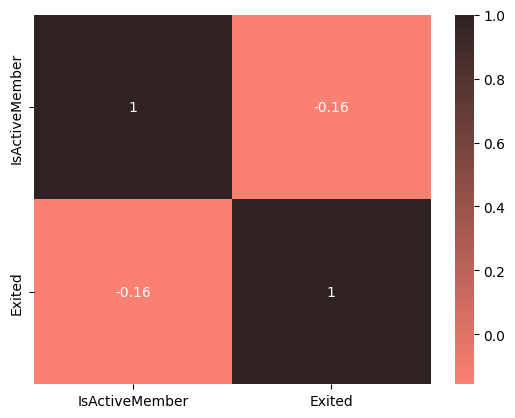

In [63]:
sns.heatmap(df[['IsActiveMember', 'Exited']].corr(), annot=True, cmap=sns.color_palette("dark:salmon_r", as_cmap=True))
plt.show()

* From the analysis, the scatter plot and correlation indicate that inactive members are more likely to exit, showing a moderate negative relationship between membership activity and churn.

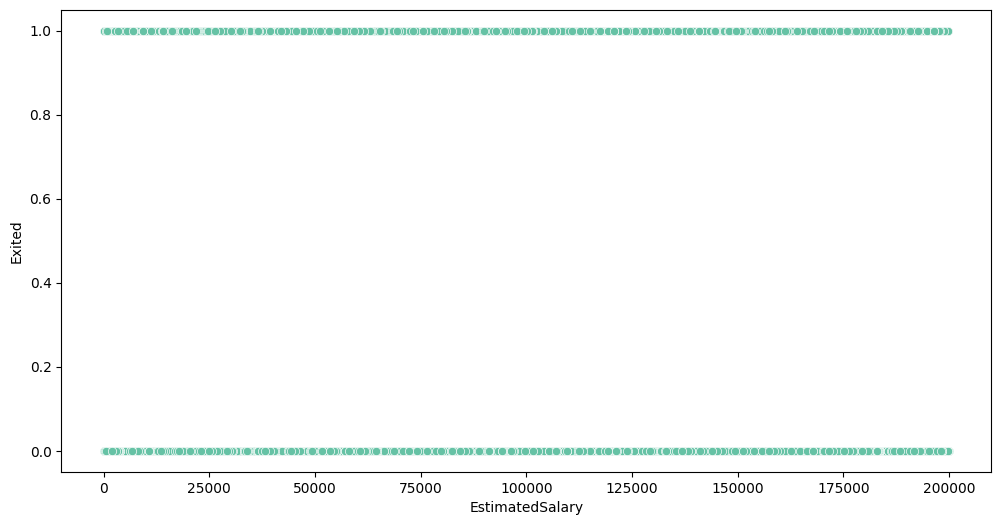

In [64]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(data=df, x='EstimatedSalary', y='Exited') 
plt.show() 


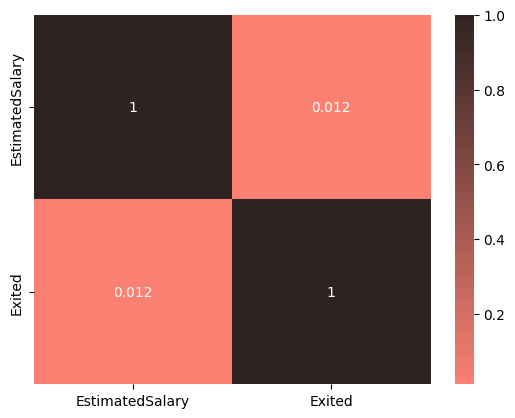

In [65]:
sns.heatmap(df[['EstimatedSalary', 'Exited']].corr(), annot=True, cmap=sns.color_palette("dark:salmon_r", as_cmap=True)) 
plt.show()

* From the analysis, the scatter plot shows no clear pattern between estimated salary and churn, and the correlation confirms a very weak relationship, indicating salary alone does not strongly influence customer exit.

**Numerical Features vs. Churn (Exited)**

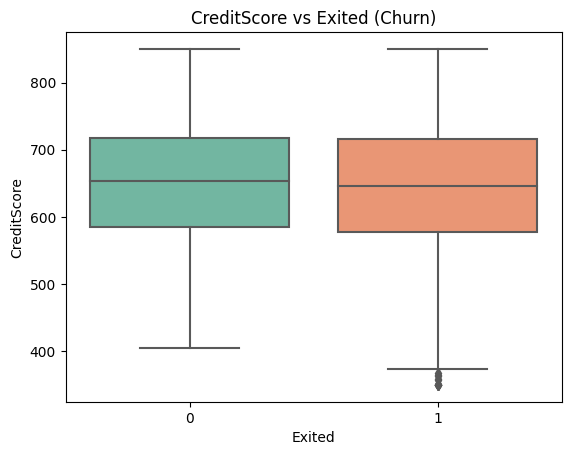

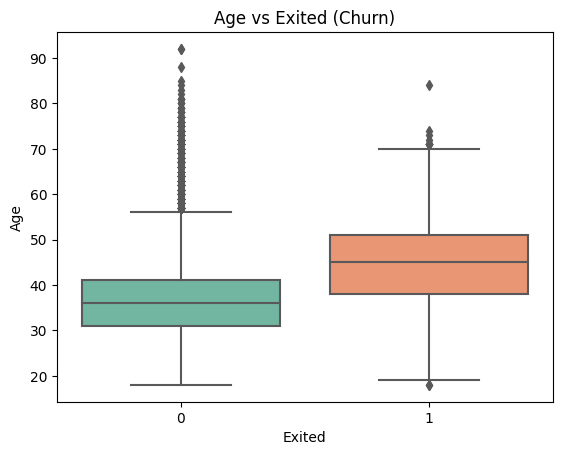

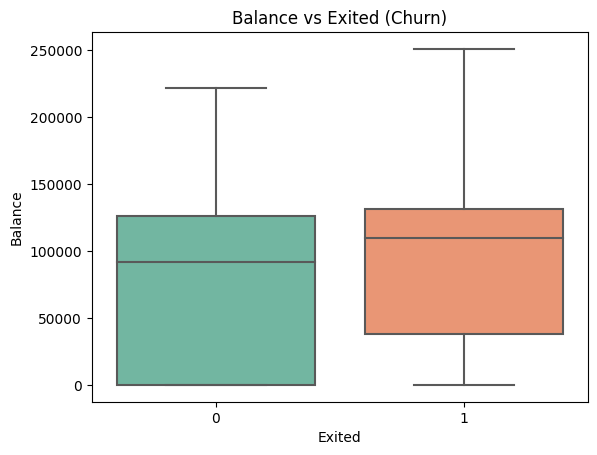

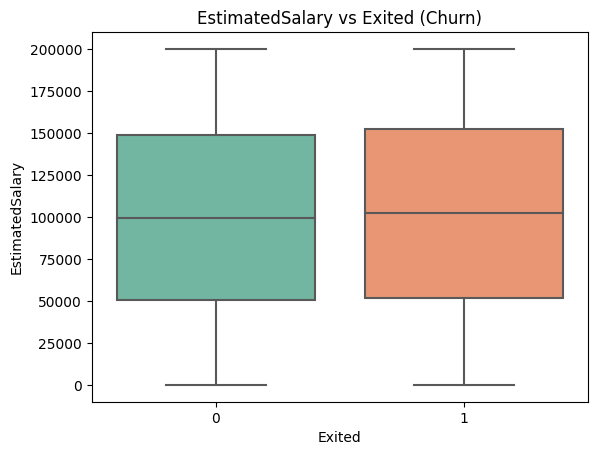

In [66]:
cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'] 
for col in cols: 
    sns.boxplot(x='Exited', y=col, data=df) 
    plt.title(f"{col} vs Exited (Churn)")
    plt.show()

* From the analysis, the boxplots show that there are slight differences in CreditScore, Age, Balance, and EstimatedSalary between customers who exited and those who stayed, but none of these features alone strongly distinguish churned customers.

**Categorical Features vs. Churn (Exited)**

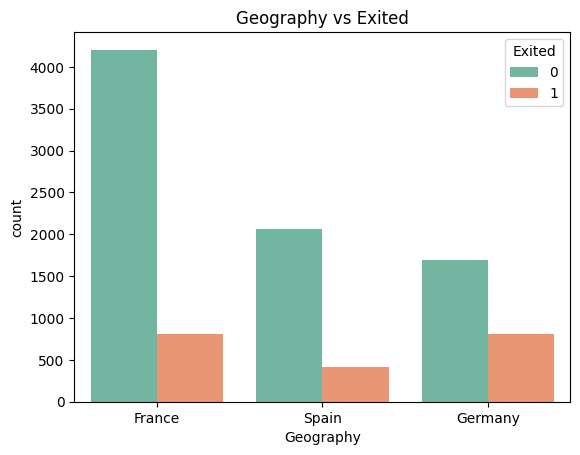

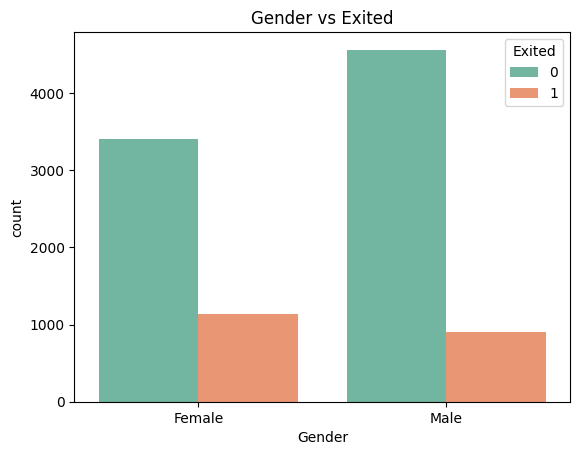

In [67]:
cols = ['Geography','Gender']
for col in cols: 
    sns.countplot(x=col, hue='Exited', data=df) 
    plt.title(f"{col} vs Exited") 
    plt.show()

* From the analysis, the countplots show that exit rates slightly vary across geography and gender, with certain countries and females having a somewhat higher likelihood of leaving

**Multivariate Analysis**

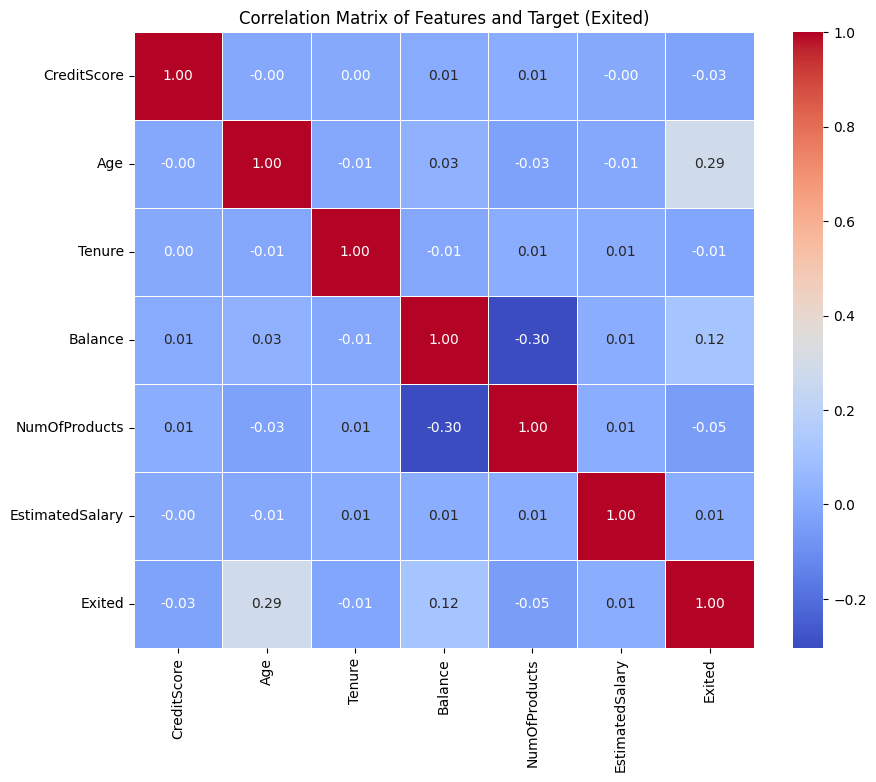

In [68]:
# Include the target 'Exited' and numerical features for correlation analysis
numerical_features_with_target = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited'] 
# Compute the correlation matrix
correlation_matrix = df[numerical_features_with_target].corr() 
# Plot the correlation heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title('Correlation Matrix of Features and Target (Exited)') 
plt.show()

* From the analysis, the correlation matrix shows that features like IsActiveMember and NumOfProducts have a slightly stronger relationship with churn, while most other numerical features show very weak correlations with Exited.

# Data Preprocessing

**Define Features X and Target y**

In [73]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

**Data Encoding**

To apply encoding to categorical columns in your dataset, the type of encoding will depend on whether the categorical variables are nominal (unordered) or ordinal (ordered)

In [74]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=False)

In [75]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


**Data Scaling**

In [78]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

**Data Splitting**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Models

**Logistic Regression model**



In [81]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [82]:
# Train Score
print(lr.score(X_train, y_train))

0.811125


In [83]:
# Test Score
print(lr.score(X_test, y_test))

0.8115


In [84]:
# Make predictions on the test set
y_pred = lr.predict(X_test)


In [85]:
# Get our metrics
lr_acc = accuracy_score(y_test, y_pred)
lr_per = precision_score(y_test, y_pred)
lr_rec = recall_score(y_test, y_pred)

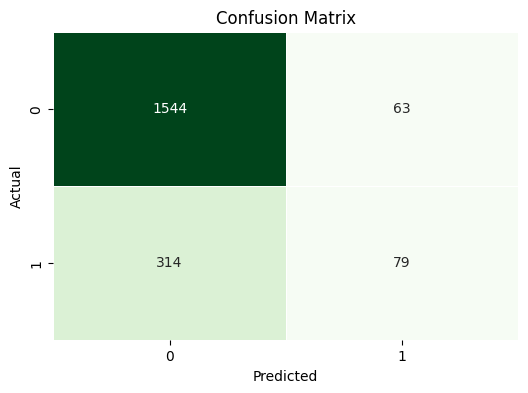

In [86]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**SVC Model**

In [87]:
# Define hyperparameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.1, 1, 10]}

svm = SVC()


In [88]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [90]:
# Get best model
best_model = grid_search.best_estimator_
best_model

SVC(C=10)

In [91]:
# Train Score
print(best_model.score(X_train, y_train))

0.881375


In [93]:
# Test Score
print(best_model.score(X_test, y_test))

0.882


In [95]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [96]:
# Get our metrics
svc_acc = accuracy_score(y_test, y_pred)
svc_per = precision_score(y_test, y_pred)
svc_rec = recall_score(y_test, y_pred)

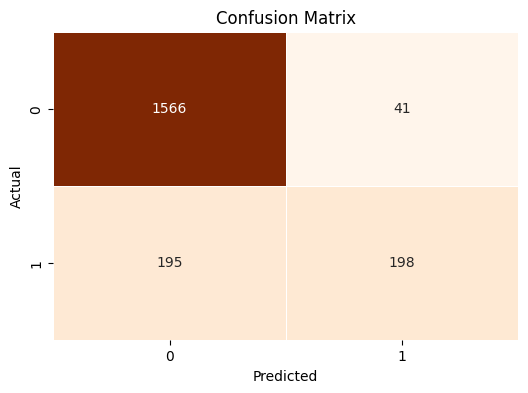

In [97]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**K-Neighbors Classifier**

In [98]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
print(knn.score(X_train, y_train))

0.8955


In [100]:
print(knn.score(X_test, y_test))

0.8295


In [101]:
# Make predictions on the test set

y_pred = knn.predict(X_test)

In [102]:
# Get our metrics
knn_acc = accuracy_score(y_test, y_pred)
knn_per = precision_score(y_test, y_pred)
knn_rec = recall_score(y_test, y_pred)

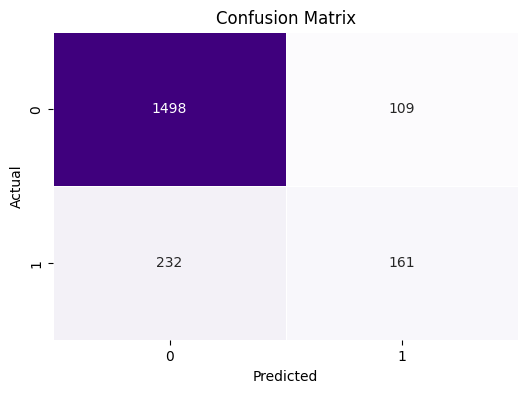

In [103]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Decision Tree Classifier**

In [104]:
clf = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)

In [105]:
# Train Score
print(clf.score(X_train, y_train))

0.840125


In [106]:
# Test Score
print(clf.score(X_test, y_test))

0.844


In [107]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [108]:
# Get our metrics
clf_acc = accuracy_score(y_test, y_pred)
clf_per = precision_score(y_test, y_pred)
clf_rec = recall_score(y_test, y_pred)

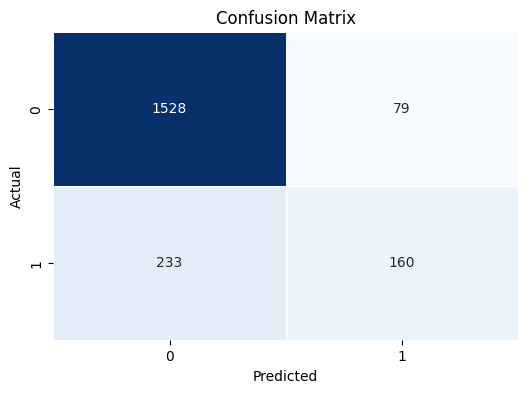

In [109]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**RandomForestClassifier Model**

In [110]:
RF_classifier = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.01)
# Train the model

RF_classifier.fit(X_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.01)

In [111]:
# Train score
RF_classifier.score(X_train, y_train)

0.7945

In [112]:
# Test score
RF_classifier.score(X_test, y_test)

0.8035

In [113]:
# Get prediction
y_pred = RF_classifier.predict(X_test)

In [114]:
# Get our metrics
rf_acc = accuracy_score(y_test, y_pred)
rf_per = precision_score(y_test, y_pred)
rf_rec = recall_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


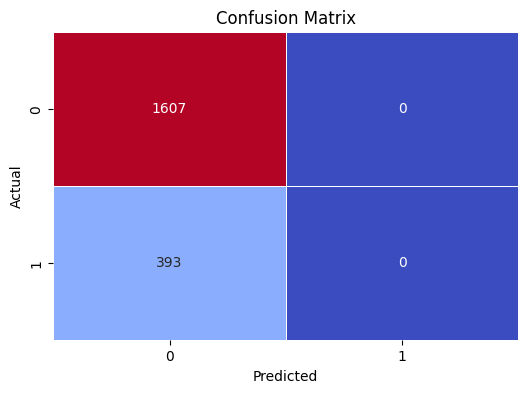

In [115]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Bagging Classifier**



In [116]:
# Create a base decision tree classifier
base_classifier = DecisionTreeClassifier(min_impurity_decrease=0.01)

# Create a bagging classifier with decision trees
bagged_classifier = BaggingClassifier(base_classifier, n_estimators=10)

# Train the bagged classifier on your data
bagged_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(min_impurity_decrease=0.01))

In [117]:
bagged_classifier.score(X_train, y_train)

0.840125

In [118]:
bagged_classifier.score(X_test, y_test)

0.844

In [120]:
# Make predictions
y_pred = bagged_classifier.predict(X_test)

In [121]:
# Get our metrics
bag_acc = accuracy_score(y_test, y_pred)
bag_per = precision_score(y_test, y_pred)
bag_rec = recall_score(y_test, y_pred)

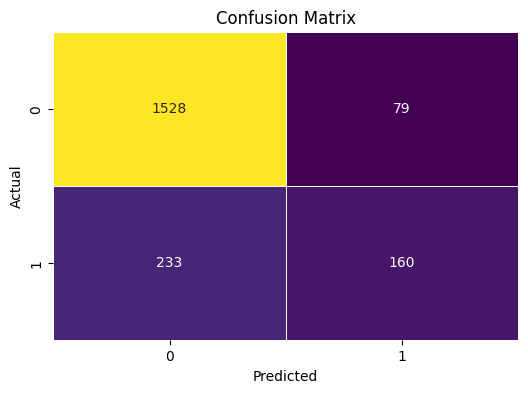

In [122]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**ExtraTreesClassifier**

In [123]:
# ExtraTreeClassifier Model
ET_classifier = ExtraTreesClassifier(n_estimators=100, min_impurity_decrease=0.01)

ET_classifier.fit(X_train, y_train)

ExtraTreesClassifier(min_impurity_decrease=0.01)

In [124]:
# Train score
ET_classifier.score(X_train, y_train)

0.7945

In [125]:
# Test score
ET_classifier.score(X_test, y_test)

0.8035

In [126]:
# Get prediction
y_pred_et = ET_classifier.predict(X_test)

In [127]:
# Get our metrics
et_acc = accuracy_score(y_test, y_pred_et)
et_per = precision_score(y_test, y_pred_et)
et_rec = recall_score(y_test, y_pred_et)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


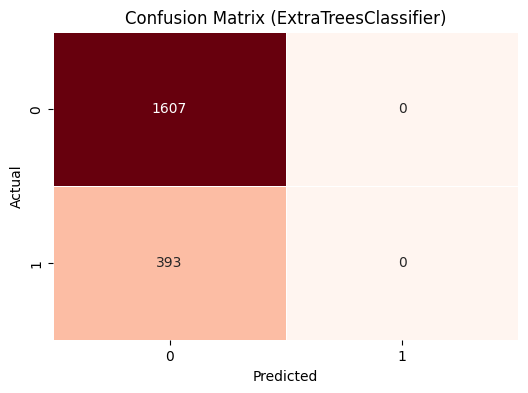

In [128]:
# Create a confusion matrix for ExtraTreeClassifier
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_et, annot=True, fmt='d', cmap='Reds', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (ExtraTreesClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**AdaBoostClassifier**

In [129]:
# Create AdaBoostClassifier Model
AB_classifier = AdaBoostClassifier(n_estimators=100)

AB_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [130]:
# Train score
AB_classifier.score(X_train, y_train)

0.861375

In [131]:
# Test score
AB_classifier.score(X_test, y_test)

0.8595

In [132]:
# Get prediction
y_pred_ab = AB_classifier.predict(X_test)

In [133]:
# Get our metrics
ada_acc = accuracy_score(y_test, y_pred_ab)
ada_per = precision_score(y_test, y_pred_ab)
ada_rec = recall_score(y_test, y_pred_ab)

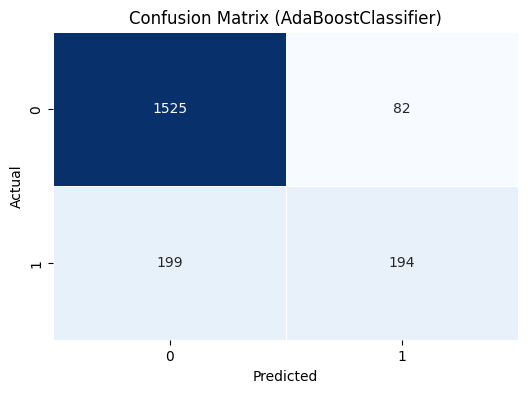

In [134]:
# Create a confusion matrix for AdaBoostClassifier
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (AdaBoostClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**XGBClassifier Model**

In [135]:
# Create XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=200)

XGB_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [136]:
# Train score
XGB_classifier.score(X_train, y_train)

0.98975

In [137]:
# Test score
XGB_classifier.score(X_test, y_test)

0.8575

In [138]:
# Get prediction
y_pred_xgb = XGB_classifier.predict(X_test)

In [139]:
# Get our metrics
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_per = precision_score(y_test, y_pred_xgb)
xgb_rec = recall_score(y_test, y_pred_xgb)

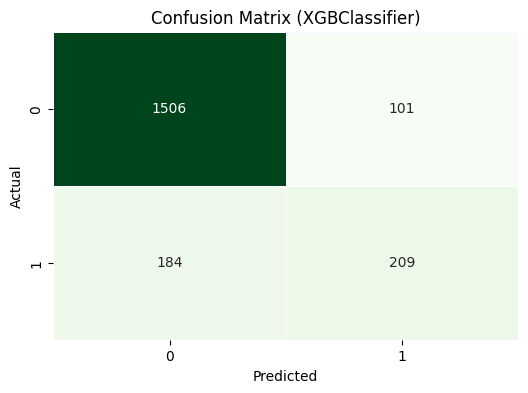

In [140]:
# Create a confusion matrix for XGBClassifier
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (XGBClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**CatBoostClassifier**

In [141]:
# Create CatBoostClassifier Model
CatBoost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

CatBoost_classifier.fit(X_train, y_train)

0:	learn: 0.6431959	total: 53.7ms	remaining: 5.31s
1:	learn: 0.6038704	total: 56ms	remaining: 2.74s
2:	learn: 0.5686605	total: 57.9ms	remaining: 1.87s
3:	learn: 0.5391874	total: 59.6ms	remaining: 1.43s
4:	learn: 0.5144147	total: 61.5ms	remaining: 1.17s
5:	learn: 0.4927521	total: 63.3ms	remaining: 992ms
6:	learn: 0.4750024	total: 65.2ms	remaining: 866ms
7:	learn: 0.4586148	total: 67.7ms	remaining: 779ms
8:	learn: 0.4444520	total: 70.3ms	remaining: 711ms
9:	learn: 0.4323027	total: 72.2ms	remaining: 650ms
10:	learn: 0.4232166	total: 74.5ms	remaining: 603ms
11:	learn: 0.4146447	total: 76.6ms	remaining: 562ms
12:	learn: 0.4081708	total: 78ms	remaining: 522ms
13:	learn: 0.3996312	total: 80ms	remaining: 492ms
14:	learn: 0.3925218	total: 82.3ms	remaining: 466ms
15:	learn: 0.3863400	total: 84.4ms	remaining: 443ms
16:	learn: 0.3819831	total: 86.6ms	remaining: 423ms
17:	learn: 0.3761884	total: 88.8ms	remaining: 404ms
18:	learn: 0.3721860	total: 91.1ms	remaining: 388ms
19:	learn: 0.3688307	total: 

In [142]:
# Train score
CatBoost_classifier.score(X_train, y_train)

0.872875

In [143]:
# Test score
CatBoost_classifier.score(X_test, y_test)

0.8665

In [144]:
# Get prediction
y_pred_catboost = CatBoost_classifier.predict(X_test)

In [145]:
# Get our metrics
cat_acc = accuracy_score(y_test, y_pred_catboost)
cat_per = precision_score(y_test, y_pred_catboost)
cat_rec = recall_score(y_test, y_pred_catboost)

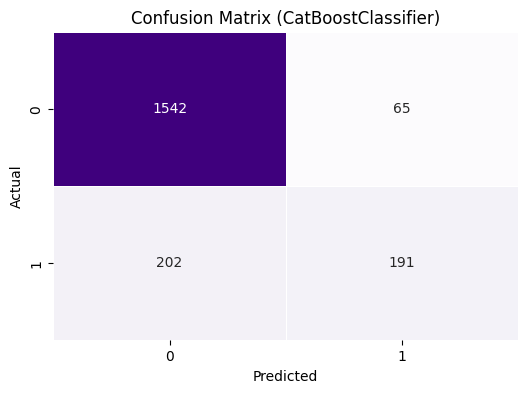

In [146]:
# Create a confusion matrix for CatBoostClassifier
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Purples', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (CatBoostClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**LGBMClassifier**

In [147]:
# Create LGBMClassifier Model
LGBM_classifier = LGBMClassifier(n_estimators=200)
LGBM_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


LGBMClassifier(n_estimators=200)

In [148]:
# Train score
LGBM_classifier.score(X_train, y_train)

0.948875

In [149]:
# Test score
LGBM_classifier.score(X_test, y_test)

0.8665

In [150]:
# Get prediction
y_pred_lgbm = LGBM_classifier.predict(X_test)

In [151]:
# Get our metrics
lgbm_acc = accuracy_score(y_test, y_pred_lgbm)
lgbm_per = precision_score(y_test, y_pred_lgbm)
lgbm_rec = recall_score(y_test, y_pred_lgbm)

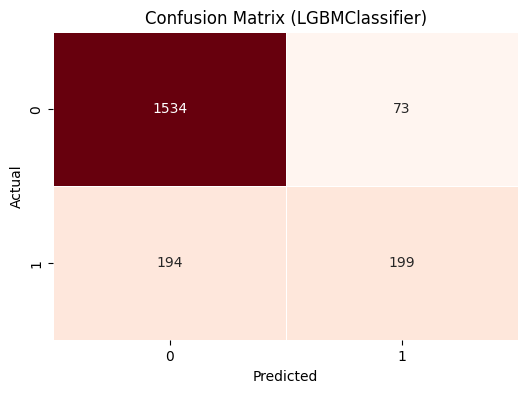

In [152]:
# Create a confusion matrix for LGBMClassifier
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Reds', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (LGBMClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model Performance**

* Logistic Regression: Misses most churners despite reasonable accuracy. Low recall indicates it struggles with the minority class.

* SVC: Very precise when predicting churners but recall is moderate. Good for confident predictions but misses some churners.

* KNN: Detects some churners but overall performance is moderate. Works okay but not very strong.

* Decision Tree & Bagging: Balanced performance but still misses many churners. Moderate precision and recall.

* Random Forest & Extra Trees: Fail to detect churners, heavily biased toward non-churners. Precision and recall are zero.

* XGBoost: Balanced performance and detects more churners than most models. Good overall choice.

* AdaBoost: Good precision, moderate recall, misclassifies some non-churners. Reliable but not perfect.

* CatBoost & LGBM: High precision, moderate recall, strong overall performance. Detect churners well while keeping false positives low.

**Conclusion**

* I evaluated multiple machine learning models to predict customer churn and found that while some models are very precise, many struggle to detect all churners due to class imbalance.

* Overall, CatBoost and LGBM provided the best balance between precision and recall, making them the strongest candidates for predicting churners.